In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import simpson

In [2]:
def xcorr_shift(d, s):
    cc = np.correlate(d, s, mode="full")
    time_shift = cc.argmax() - len(d) + 1
    return time_shift

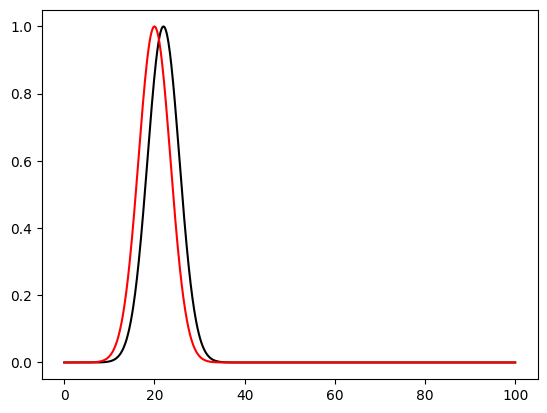

In [3]:
t = np.linspace(0, 100, 1000)

synt = np.exp(-(t-20)**2/25)
obsd = np.exp(-(t-22)**2/25)
deltat = t[1]-t[0]

fig, ax = plt.subplots()
ax.plot(t, obsd, "k")
ax.plot(t, synt, "r")

In [4]:
ishift = xcorr_shift(obsd, synt)
tshift = ishift * deltat
print("tshift:", tshift)
misfit = 0.5 * tshift**2

tshift: 2.002002002002002


### Traveltime
Misfit function
$$
\chi = \frac{1}{2} \sum_{i=0}^{N_r} [T^{obs}_{i} - T^{syn}_{i}]^2
$$
Adjoint source for i-th station
$$
f^{\dagger}_i(t) = \frac{1}{N} ~ \left[ T^{obs}_{i} - T^{syn}_{i} \right] ~ 
\partial_t s_i(t,m),
$$

where 
$$
N = \int_0^T ~ \partial_t s_i(t,m) ~
\partial_t s_i(t,m) dt.
$$

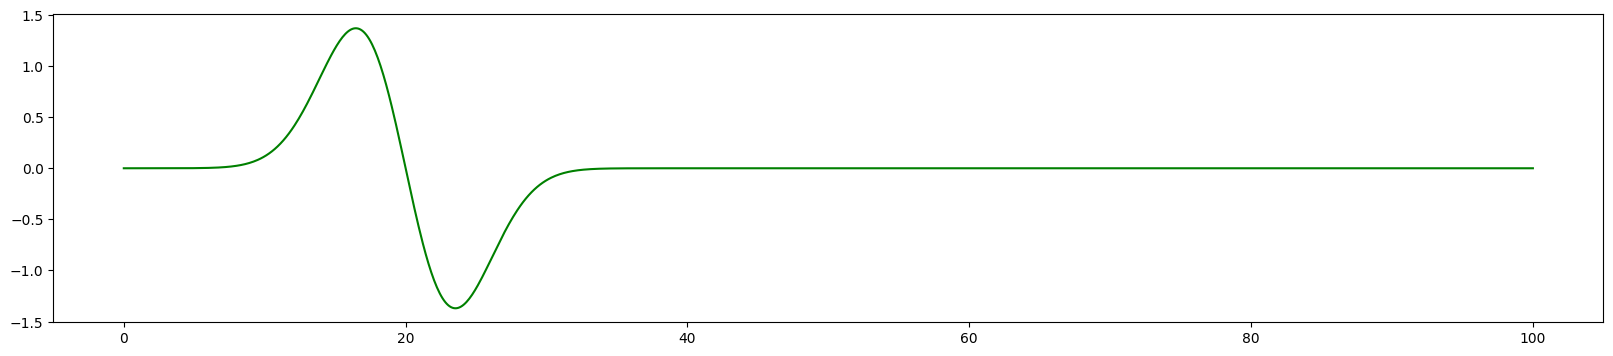

In [5]:
# derivative of synthetic
dt_s = np.gradient(synt, deltat)
# norm
norm = simpson(y=dt_s*dt_s, dx=deltat)
# dt2_s = np.gradient(dt_s, deltat)
# norm2 = simpson(s*dt2_s, dx=deltat)

adjoint_source1 = tshift * dt_s / norm
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(t, adjoint_source1, "g")

### Traveltime
Misfit function
$$
\chi = \frac{1}{2} \sum_{i=0}^{N_r} [T^{obs}_{i} - T^{syn}_{i}]^2
$$
Adjoint source for i-th station
$$
f^{\dagger}_i(t) = - \frac{1}{N} ~ \left[ T^{obs}_{i} - T^{syn}_{i} \right] ~ 
\partial_t s_i(t,m),
$$

where 
$$
N = \int_0^T ~ s_i(t,m) ~
\partial^2_t s_i(t,m) dt.
$$

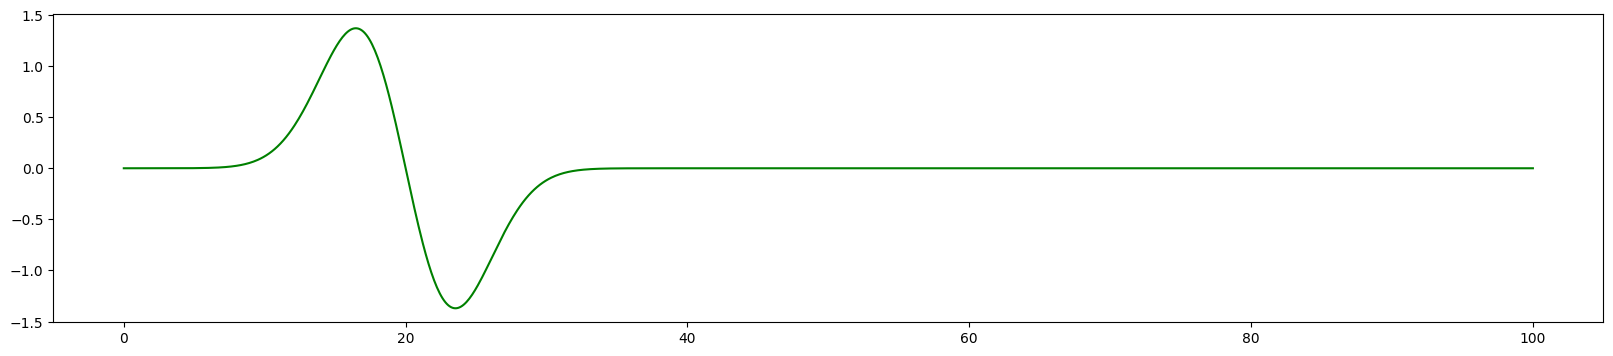

In [6]:
# derivative of synthetic
dt_s = np.gradient(synt, deltat)
# norm
dt2_s = np.gradient(dt_s, deltat)
norm2 = simpson(synt*dt2_s, dx=deltat)

adjoint_source2 = - tshift * dt_s / norm2
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(t, adjoint_source1, "g")

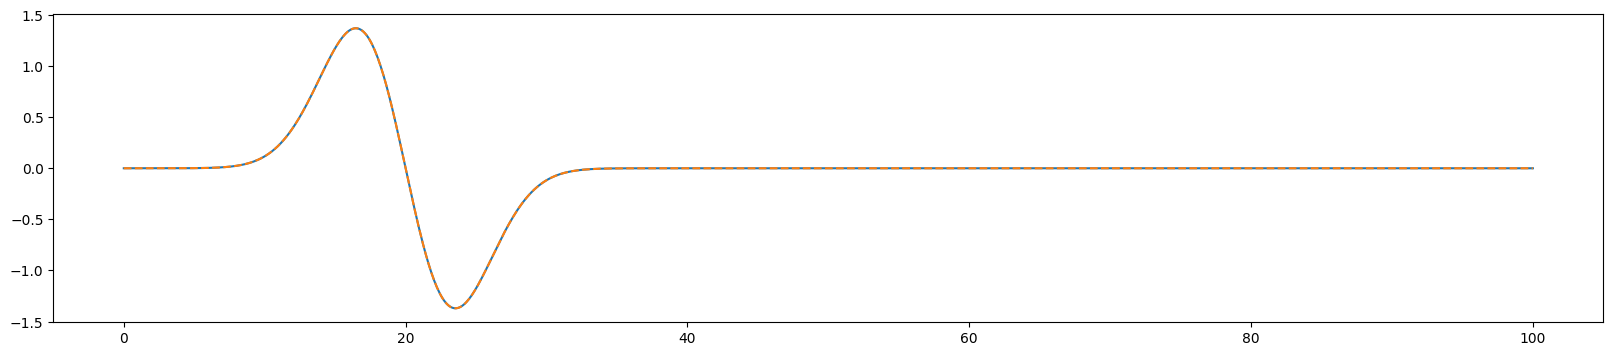

In [7]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(t, adjoint_source1)
ax.plot(t, adjoint_source2, "--")